In [3]:
#importing required packages for logistic regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve)

In [8]:
df = pd.read_csv("heartdiseasedata.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
print("DF Columns:", df.columns)

DF Columns: Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


<Axes: xlabel='age', ylabel='Count'>

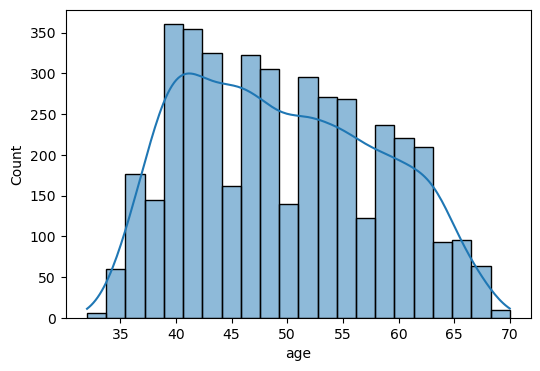

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde = True)

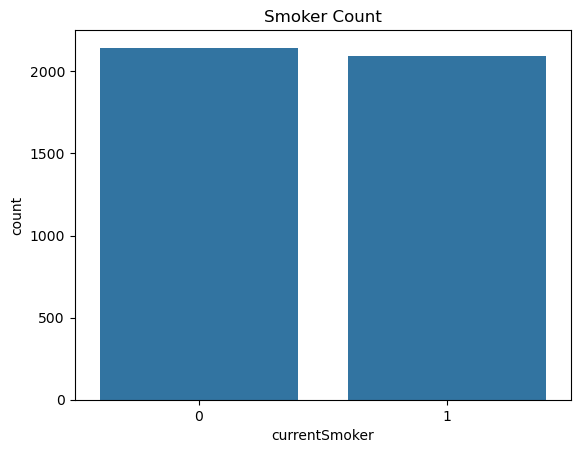

In [18]:
sns.countplot( x = 'currentSmoker', data = df)
plt.title("Smoker Count")
plt.show()

Text(0.5, 1.0, 'Age and Current Smoker or not')

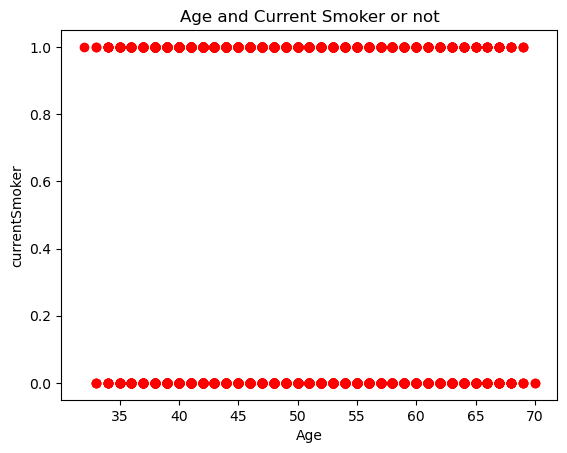

In [23]:
plt.scatter(df['age'], df['currentSmoker'], color = "red")
plt.xlabel("Age")
plt.ylabel("currentSmoker")
plt.title("Age and Current Smoker or not")

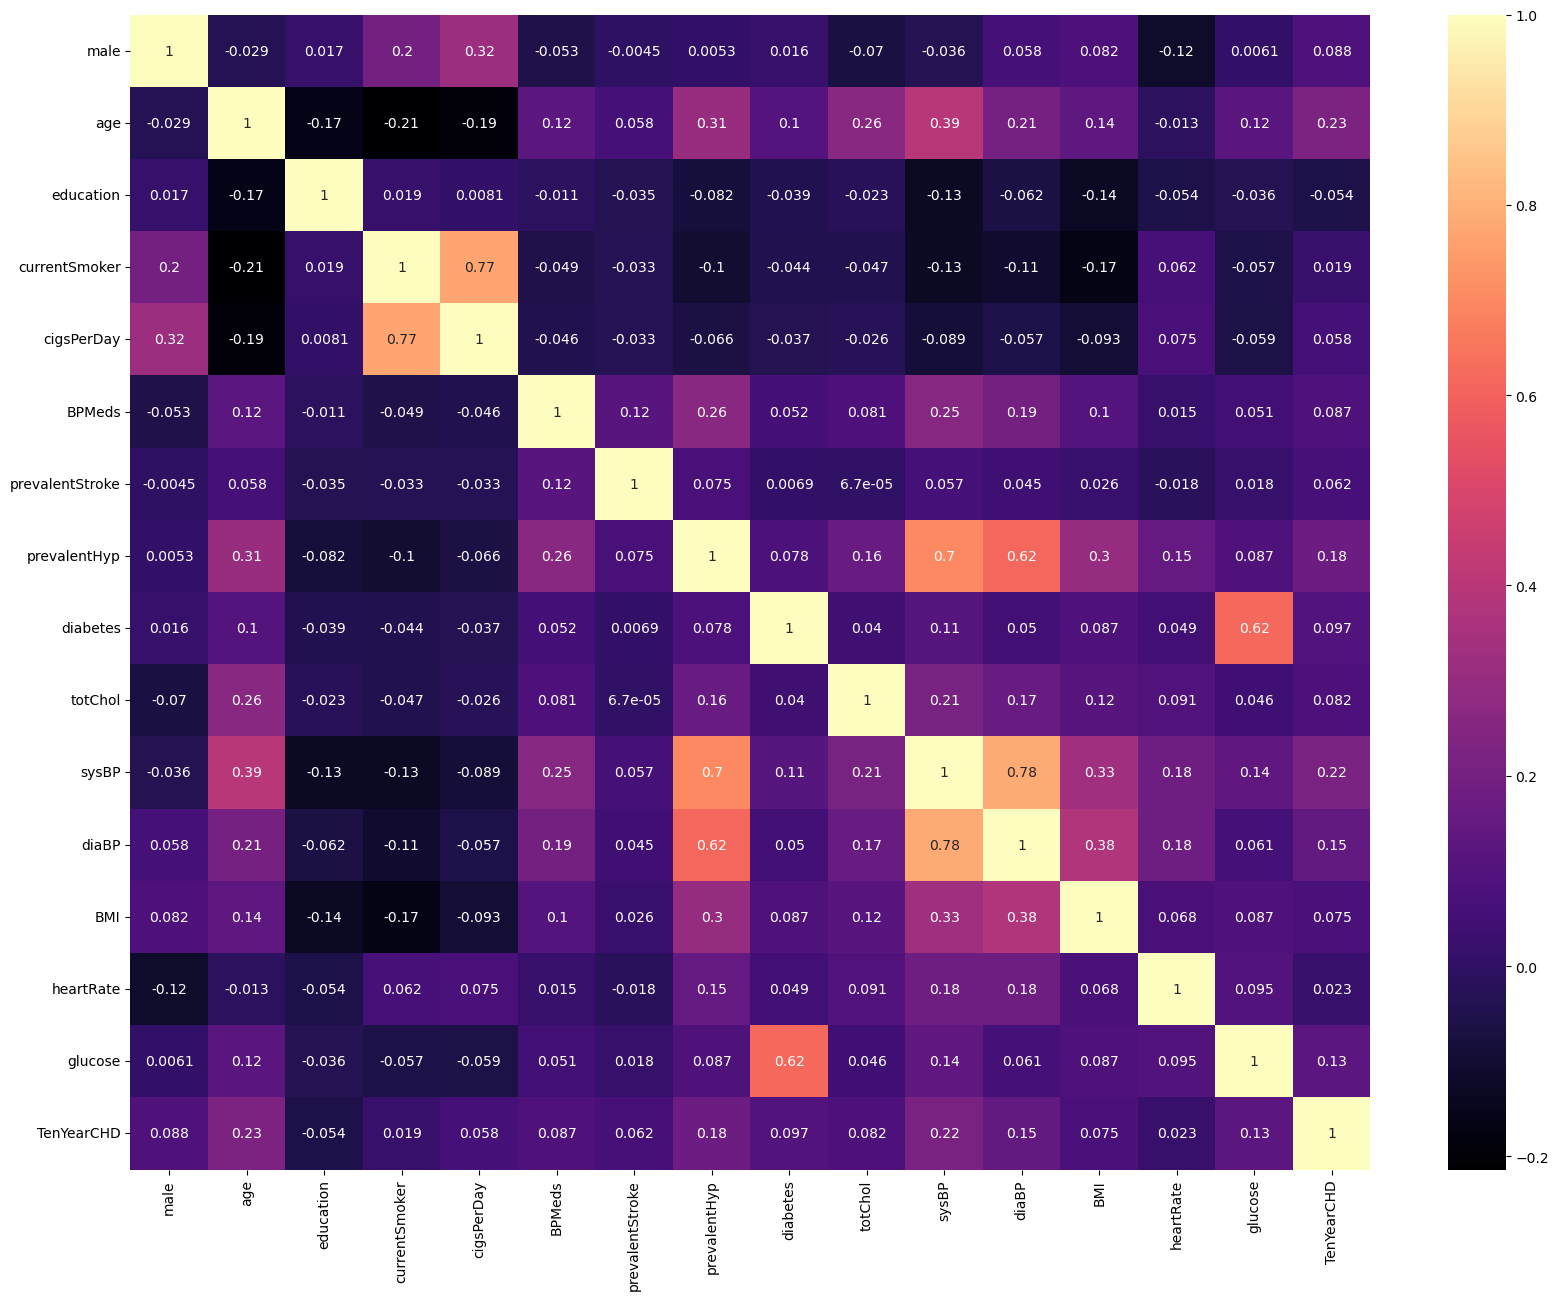

In [31]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, cmap = "magma")
plt.show()

In [28]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

In [34]:
x = df[['age']]
y = df['currentSmoker']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [35]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(x_test_scaled)
print(y_pred)

[0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0
 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1
 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 0 0 1 0 1 

In [40]:
new_value = pd.DataFrame([[45]], columns = ['age'])
new_value_scaled = scaler.transform(new_value)

In [42]:
prediction = model.predict(new_value_scaled)
probability = model.predict_proba(new_value_scaled)

In [44]:
print("Prediction (0: No, 1: Yes) --- ",prediction)
print("Probability:", probability)

Prediction (0: No, 1: Yes) ---  [1]
Probability: [[0.44338701 0.55661299]]


In [48]:
# creating smooth range

x_range = np.linspace(df['age'].min(), df['age'].max(), 300).reshape(-1,1)

In [51]:
# converting into DataFrame with correct column name

x_range_df = pd.DataFrame(x_range, columns = ['age'])

In [54]:
# scaling

x_range_scaled = scaler.transform(x_range_df)

In [55]:
# predicting propbabilities

y_range_prob = model.predict_proba(x_range_scaled)[:, -1]

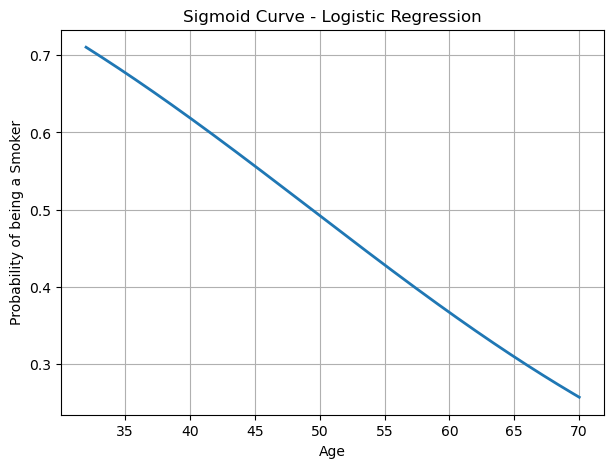

In [58]:
# plotting - Sigmoid Graph

plt.figure(figsize = (7,5))
plt.plot(x_range, y_range_prob, linewidth = 2)
plt.grid("True")
plt.title("Sigmoid Curve - Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Probability of being a Smoker")
plt.show()

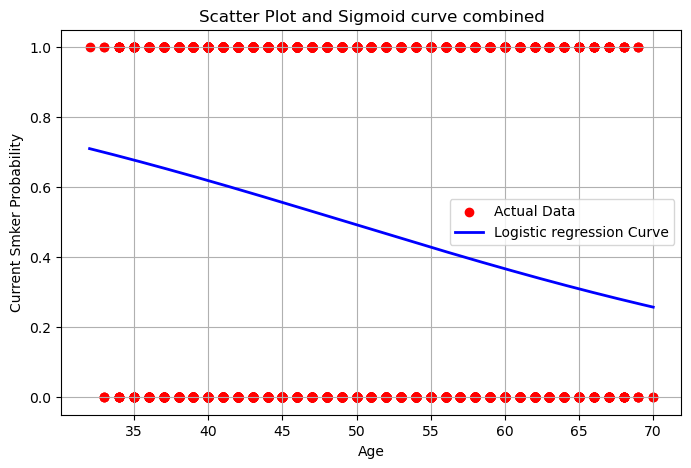

In [64]:
plt.figure(figsize=(8,5))

# Scatter plot of actual data
plt.scatter(df["age"], df["currentSmoker"], color = "red", label = "Actual Data")

# sigmoid curve
plt.plot(x_range, y_range_prob, color = "blue", linewidth = 2, label = "Logistic regression Curve")

# other plotting
plt.xlabel("Age")
plt.ylabel("Current Smker Probability")
plt.title("Scatter Plot and Sigmoid curve combined")
plt.legend()
plt.grid("True")
plt.show()

In [67]:
new_value = pd.DataFrame([[45]], columns = ['age'])
new_scaled =  scaler.transform(new_value)

In [68]:
prediction = model.predict(new_scaled)
prob = model.predict_proba(new_scaled)

In [70]:
print("Prediction:",prediction)
print("Probability:",prob)

Prediction: [1]
Probability: [[0.44338701 0.55661299]]


In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6014150943396226


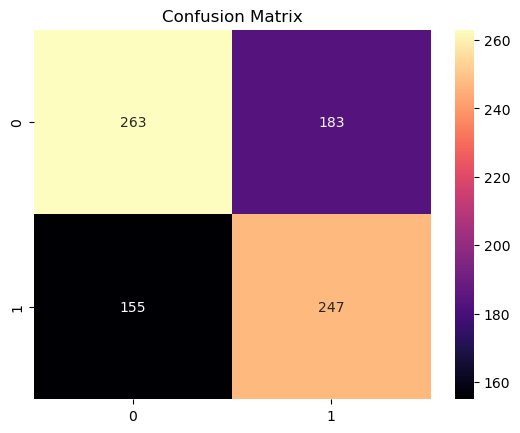

In [74]:
cm =  confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "magma")
plt.title("Confusion Matrix")
plt.show()

In [78]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))


Classification Report:

               precision    recall  f1-score   support

           0       0.63      0.59      0.61       446
           1       0.57      0.61      0.59       402

    accuracy                           0.60       848
   macro avg       0.60      0.60      0.60       848
weighted avg       0.60      0.60      0.60       848



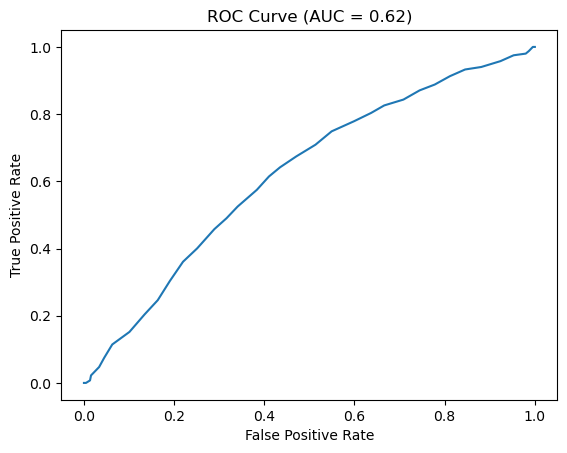

In [86]:
y_prob =  model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
auc = roc_auc_score (y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(auc))
plt.show()

In [89]:
param_grid = { 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs','liblinear']}

grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Best Score: 0.6014749262536874


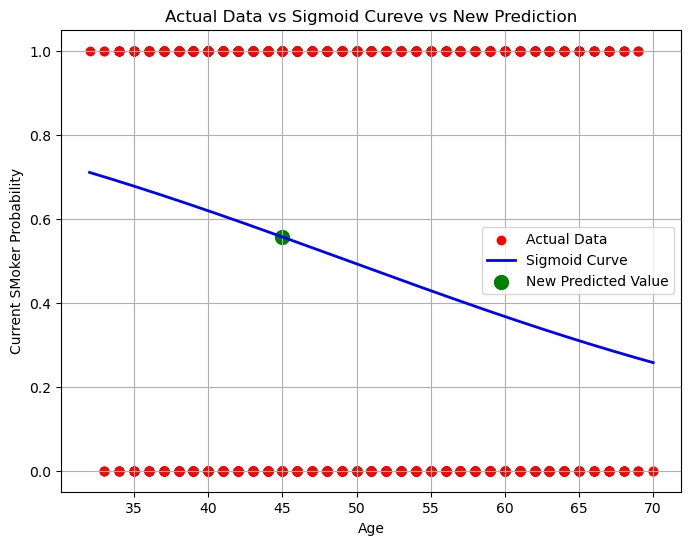

In [91]:
# plotting

plt.figure(figsize = (8,6))
#Actual data
plt.scatter(df['age'], df['currentSmoker'], color = 'red', label = "Actual Data")
# Sigmoid Curve
plt.plot(x_range, y_range_prob, color = 'blue', linewidth = 2, label = "Sigmoid Curve")
# New Value Prediction
plt.scatter(new_value, prob[:,1], color ="green", s = 100, label = "New Predicted Value")

plt.xlabel("Age")
plt.ylabel("Current SMoker Probability")
plt.title("Actual Data vs Sigmoid Cureve vs New Prediction")
plt.legend()
plt.grid("True")
plt.show()